# Search Engine Group 4

## Imports and data loading

In [1]:
FILEPATH = "datascience.stackexchange.com" # path to unzipped data

import pandas as pd
import numpy as np
import pickle as pkl
from math import log10,sqrt
import re
import tkinter as tk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

def extract_data(filepath):
    return pd.read_xml(filepath, parser="etree", encoding="utf8")

[nltk_data] Downloading package stopwords to /home/himmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
raw_posts = extract_data(filepath=FILEPATH+"/Posts.xml")
users = extract_data(filepath=FILEPATH+"/Users.xml") # usefull for user reputation
comments = extract_data(filepath=FILEPATH+"/Comments.xml") # usefull for user reputation and accepted answer
votes = extract_data(filepath=FILEPATH+"/Votes.xml") # usefull for post score
badges = extract_data(filepath=FILEPATH+"/Badges.xml") # usefull for user reputation
file = "posts.pkl"  # precomputed tokenization in file posts.pkl
with open(file, 'rb') as f:
    posts = pkl.load(f)

print(posts.head())


       Id  PostTypeId             CreationDate  Score  ViewCount  \
0  115535           1  2022-10-24T12:58:24.757      1       29.0   
1  115536           1  2022-10-24T13:45:55.820      0       30.0   
2  115537           1  2022-10-24T13:56:40.603      0       12.0   
3  115538           2  2022-10-24T14:36:39.480      1        NaN   
4  115539           1  2022-10-24T15:22:37.823      0       14.0   

                                                Body  OwnerUserId  \
0  [pa, in, advance, if, this, question, is, so, ...      30838.0   
1  [pi, just, need, to, check, my, understanding,...      87037.0   
2  [pi, am, trying, to, tune, gradient, boost, ca...      64199.0   
3  [p, it, is, correct, if, you, compare, neural,...     119140.0   
4  [pi, starting, to, study, how, to, rank, words...     141937.0   

          LastActivityDate                                              Title  \
0  2022-10-24T12:58:24.757  [information, retrieval, vs, recommendation, s...   
1  2022-10-24T

In [3]:
def get_inverted_index(posts,column): # returns inverted index
    inverted_index = {}
    for i in range(len(posts)):
        post_id = str(posts['Id'][i])
        for word in posts[column][i]:
            if word not in inverted_index:
                inverted_index[word] = {}
            if post_id not in inverted_index[word]:
                inverted_index[word][post_id] = 0
            inverted_index[word][post_id] = inverted_index[word][post_id] + 1
    return inverted_index
  
inverted_index_body = get_inverted_index(posts,"Body")
inverted_index_title = get_inverted_index(posts,"Title")

In [4]:
# remove stopwords
stop_words_nltk = stopwords.words('english') # list of stopwords
stop_words = set(stop_words_nltk + ["p"])
print(stop_words)

def remove_stopwords(inverted_index):
    for word in stop_words:
        if word in inverted_index:
            del inverted_index[word]
    return inverted_index

inverted_index_body = remove_stopwords(inverted_index_body)
inverted_index_title = remove_stopwords(inverted_index_title)

{'ain', 'which', 'on', 'there', 'can', 'here', "it's", 'yourselves', "you've", 'into', 'just', "haven't", 'has', 'had', 'isn', 'do', 'ourselves', 'you', 'her', 'the', 'have', 'only', "isn't", 'a', 'does', 'if', "needn't", 'all', "aren't", 'their', 'mightn', "weren't", 'too', 'myself', 'of', 'were', 'did', 'hadn', 'as', 'mustn', 'himself', 'be', 'they', 'should', "mustn't", 'needn', 'where', 'during', 'this', 'other', 'against', 'them', 'over', 'who', 'with', 'is', 'themselves', 'was', 'again', 'p', 'more', 'under', 't', "shan't", 'further', "mightn't", 'wasn', 'for', 'through', 'most', 'not', 'from', 'doing', "hasn't", 'ma', 'him', 'his', 'then', 'yours', 'its', 'once', 'and', 'will', 've', 'down', 'how', 'at', 'we', 'such', 'no', 'couldn', 'own', "that'll", 'me', 'having', 'few', 'those', 'because', 's', 'before', 'shouldn', "wasn't", 'been', 'hasn', 'both', 'some', "you'd", 'aren', 'these', 'hers', 'in', "didn't", 'haven', 'after', 'weren', 'am', 'won', 'are', 'or', 'about', 'an', "h

In [5]:
def get_tf_idf(inverted_index, posts): # returns tf_idf
    tf_idf = {}
    for word in inverted_index:
        tf_idf[word] = {}
        for post_id in inverted_index[word]:
            tf_idf[word][post_id] = inverted_index[word][post_id] * log10(len(posts)/len(inverted_index[word]))
    return tf_idf

tf_idf_body = get_tf_idf(inverted_index_body, posts)
tf_idf_title = get_tf_idf(inverted_index_title, posts)



In [6]:
# posts that contain the word python the most in the body and title
print(sorted(tf_idf_body["python"].items(), key=lambda x: x[1], reverse=True)[0:5])
print(sorted(inverted_index_body["python"].items(), key=lambda x: x[1], reverse=True)[0:5])
print(sorted(tf_idf_title["python"].items(), key=lambda x: x[1], reverse=True)[0:5])
print(sorted(inverted_index_title["python"].items(), key=lambda x: x[1], reverse=True)[0:5])

[('116141', 21.661042056227643), ('339', 21.661042056227643), ('109823', 19.380932366098417), ('76841', 15.96076783090458), ('95007', 15.96076783090458)]
[('116141', 19), ('339', 19), ('109823', 17), ('76841', 14), ('95007', 14)]
[('29542', 3.6589177006247477), ('65063', 3.6589177006247477), ('11404', 3.6589177006247477), ('64403', 3.6589177006247477), ('29057', 3.6589177006247477)]
[('29542', 2), ('65063', 2), ('11404', 2), ('64403', 2), ('29057', 2)]


In [7]:
# stemmer
stemmer = PorterStemmer()

def stem_inverted_index(inverted_index):
    stemmed_inverted_index = {}
    for word in inverted_index:
        stemmed = stemmer.stem(word) # stem word
        if stemmed not in stemmed_inverted_index:
            stemmed_inverted_index[stemmed] = {}
        for post_id in inverted_index[word]:
            if post_id not in stemmed_inverted_index[stemmed]:
                stemmed_inverted_index[stemmed][post_id] = 0
            stemmed_inverted_index[stemmed][post_id] = stemmed_inverted_index[stemmed][post_id] + inverted_index[word][post_id]
    return stemmed_inverted_index

stemmed_inverted_index_body = stem_inverted_index(inverted_index_body)
stemmed_inverted_index_title = stem_inverted_index(inverted_index_title)



In [8]:
print(sorted(inverted_index_body["open"].items(), key=lambda x: x[1], reverse=True)[0:5])
print(sorted(stemmed_inverted_index_body["open"].items(), key=lambda x: x[1], reverse=True)[0:5])

[('115768', 13), ('60039', 11), ('119916', 11), ('20380', 9), ('117097', 8)]
[('76321', 54), ('74666', 25), ('115768', 13), ('60039', 11), ('119916', 11)]


In [9]:
from transformers import BertTokenizer, BertModel


def text_process(query):
    # tokenize query (or text) with bert-case-uncased tokenizer
    # keep only alpha words
    # remove stopwords
    # stem query
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    query = re.sub(r'[^\w\s]', '', query)
    query = tokenizer.tokenize(query)
    query = [word for word in query if word.isalpha()]
    query = [word for word in query if word not in stop_words]
    query = [stemmer.stem(word) for word in query]
    return query

query = "information retrieval"
query = text_process(query)
print(query) # ['error', 'open', 'file', 'python']



2023-06-02 19:42:33.939909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 19:42:34.299818: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-02 19:42:34.299839: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-02 19:42:35.654754: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

['inform', 'retriev']


## Getting relevant metadata from the dataset

In [10]:
def get_tags(post_id):
    taglist = posts[posts["Id"] == post_id]["Tags"]
    if taglist.values[0] is None: return []
    taglist = taglist.values[0].replace("<", "").replace(">", " ").split(" ")
    return [tag.replace("-", " ") for tag in taglist]

def get_all_tags():
    all_tags = []
    for i in range(len(posts)):
        all_tags = all_tags + get_tags(posts["Id"][i])
    return list(set(all_tags))

# all_tags = get_all_tags()

In [11]:
def get_body(posts, post_id):
    # tokenized body of the post
    body = posts[posts["Id"] == post_id]["Body"].values[0]
    return body

def get_title(posts, post_id):
    # tokenized title of the post
    title = posts[posts["Id"] == post_id]["Title"].values[0]
    return title

def get_tags_from_postid(post_id):
    taglist = posts[posts["Id"] == post_id]["Tags"]
    if taglist.values[0] is None: return []
    taglist = taglist.values[0].replace("<", "").replace(">", " ").split(" ")
    # replace "-"" with " "
    for i in range(len(taglist)):
        taglist[i] = text_process(taglist[i].replace("-", " "))
    return taglist[:-1]

def get_raw_tags_from_postid(post_id):
    taglist = posts[posts["Id"] == post_id]["Tags"]
    if taglist.values[0] is None: return []
    taglist = taglist.values[0].replace("<", "").replace(">", " ").split(" ")
    return taglist[:-1]

# print(get_tags_from_postid(115768))

def get_reputation(post_id):
    # reputation of the user who posted the post
    owner_user_id = posts[posts["Id"] == post_id]["OwnerUserId"].values[0]
    if pd.isna(owner_user_id):
        return 0
    reputation = users[users["Id"] == int(owner_user_id)]["Reputation"].values[0]
    return reputation


# print(get_reputation(posts, 115768))
def get_inverted_index_tags(posts,tag_to_processed_tag_dict):
    # Inverted index of tags
    inverted_index_tags = {}
    for i in range(len(posts)):
        post_id = posts["Id"][i]
        taglist = [tag_to_processed_tag_dict[tag] for tag in get_raw_tags_from_postid(post_id)]
        taglist = [t for tag in taglist for t in tag]
        for tag in taglist:
            if tag not in inverted_index_tags:
                inverted_index_tags[tag] = {}
            if post_id not in inverted_index_tags[tag]:
                inverted_index_tags[tag][post_id] = 0
            inverted_index_tags[tag][post_id] = inverted_index_tags[tag][post_id] + 1
    return inverted_index_tags


def get_votes(post_id):
    # number of votes of the post
    nb_votes = posts[posts["Id"] == post_id]["Score"].values[0]
    return nb_votes

def get_number_answers(post_id):
    # number of answers of the post
    nb_answers = posts[posts["ParentId"] == post_id].shape[0]
    return nb_answers

def get_badges_user(post_id):
    # number of badges of the user who posted the post
    # use the variable badges and users
    owner_user_id = posts[posts["Id"] == post_id]["OwnerUserId"].values[0]
    if pd.isna(owner_user_id):
        return 0
    nb_badges = badges[badges["UserId"] == int(posts[posts["Id"] == post_id]["OwnerUserId"])]["Class"].shape[0]
    return nb_badges

def get_answered(post_id):
    # 1 if the post is answered, 0 otherwise
    # use the variable comments
    if comments[comments["PostId"] == int(post_id)].shape[0] > 0:
        return 1
    else:
        return 0

def get_views(post_id):
    # number of views of the post
    # use the variable posts
    nb_views = posts[posts["Id"] == post_id]["ViewCount"].values[0]
    return nb_views

# print(posts.head())

print(get_views(12761))

60888.0


In [12]:
#tests
#print(get_body(posts,123)) OK
#print(get_title(posts,5)) OK
#print(get_tags_from_postid(5)) OK
#print(get_raw_tags_from_postid(5)) OK
#print(get_reputation(5)) OK
#print(get_votes(5)) OK
# get_reputation(123)

In [13]:
# from tqdm.notebook import tqdm
# tag_to_processed_tag_dict ={}
# for tag in tqdm(all_tags):
#     tag_to_processed_tag_dict[tag] = text_process(tag)
    

In [14]:
# # save tag_to_processed_tag_dict
# import pickle
# with open('tag_to_processed_tag_dict.pickle', 'wb') as handle:
#     pickle.dump(tag_to_processed_tag_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)$
# load tag_to_processed_tag_dict
import pickle
with open('tag_to_processed_tag_dict.pickle', 'rb') as handle:
    tag_to_processed_tag_dict = pickle.load(handle)

In [15]:
print(list(tag_to_processed_tag_dict.keys()))

['', 'regex', 'nosql', 'validation', 'odds', 'rocr-package', 'mlops', 'bayesian', 'rasa-nlu', 'perplexity', 'data-source', 'real-ml-usecase', 'randomized-algorithms', 'sequential-pattern-mining', 'google-prediction-api', 'feature-scaling', 'noise', 'colab', 'marketing', 'survival-analysis', 'python-polars', 'markov', 'bootstraping', 'uncertainty', 'jaccard-coefficient', 'fasttext', 'ibm-watson', 'cross-entropy', 'json', 'state-of-the-art', 'training', 'ai', 'ngrams', 'machine-translation', 'multitask-learning', 'probability-calibration', 'api', 'embeddings', 'web-scraping', 'octave', 'apache-kafka', 'exploratory-factor-analysis', 'normalization', 'mse', 'csv', 'catboost', 'stacked-lstm', 'bigdata', 'vgg16', 'anonymization', 'hyperparameter', 'caret', 'openai-gpt', 'flask', 'methodology', 'visualization', 'gradient', 'elastic-search', 'scoring', 'finite-precision', 'kernel', 'consumerweb', 'knowledge-base', 'nlp', 'bioinformatics', 'spatial-transformer', 'stacking', 'pandas', 'apache-pi

In [16]:
# inverted_index_tags = get_inverted_index_tags(posts,tag_to_processed_tag_dict) 

In [17]:
# import pickle
# # save inverted index tags as pkl
# with open('inverted_index_tags.pkl', 'wb') as f:
#     pickle.dump(inverted_index_tags, f)

In [18]:
# load inverted index tags from pkl
with open('inverted_index_tags.pkl', 'rb') as f:
    inverted_index_tags = pickle.load(f)

In [19]:
print(list(inverted_index_tags.keys()))
# print(inverted_index_tags["optimization"])

['recommend', 'inform', 'ai', 'drop', 'machin', 'r', 'accuraci', 'ensembl', 'meta', 'rank', 'learn', 'classif', 'nl', 'multi', 'reinforc', 'polici', 'tabl', 'rs', 'binari', 'big', 'apach', 'map', 'deep', 'neural', 'con', 'ml', 'python', 'time', 'chu', 'random', 'supervis', 'comput', 'languag', 'open', 'imag', 'transform', 'hug', 'pre', 'data', 'web', 'predict', 'forecast', 'panda', 'prep', 'featur', 'l', 'loss', 'optim', 'statist', 'count', 'normal', 'sql', 'databas', 'object', 'grid', 'isol', 'excel', 'semant', 'fourier', 'nu', 'mat', 'sampl', 'ke', 'cnn', 'spa', 'sv', 'regress', 'algorithm', 'text', 'graph', 'sci', 'faster', 'commun', 'pc', 'deploy', 'dimension', 'model', 'train', 'distribut', 'tensor', 'gp', 'visual', 'x', 'hyper', 'hardwar', 'stanford', 'cluster', 'anomali', 'correl', 'un', 'encod', 'dummi', 'code', 'mathemat', 'class', 'evalu', 'kernel', 'ju', 'bert', 'semi', 'c', 'java', 'wolf', 'confus', 'soft', 'fine', 'pipelin', 'token', 'hierarch', 'autom', 'km', 'linear', 'i

## Search Engine (We name it : CobraSearch)

Our goal is to use a probabilistic model because it is well suited to an inverted index. The most used probabilistic model is the BM25 model, However, it supposes that all documents have the same prior relevance. In our case, we want to take into account the non textual metadata of the documents. \
An extensive bibliographic overview has led us to use the following model :
Our chosen model is based on the following paper: https://dl.acm.org/doi/10.1561/1500000019 Sections 3.6 and 3.7 \
It is derived from the BM25 model with 3 Streams : title, body and tags, but also taking into account non textual features like the number votes, comments, etc...


In [20]:
from tqdm.notebook import tqdm

log10_values = [0] # precompute log10 values
for i in range(1,100000):
    log10_values.append(np.log10(i))

def post_to_post_feature(post_id):
    post_feature = {}
    post_feature["post_id"] = post_id
    # post_feature["tf_body"] = term_frequency(post_id, inverted_index_body)
    # post_feature["tf_title"] = term_frequency(post_id, inverted_index_title)
    # post_feature["tf_tags"] = term_frequency(post_id, inverted_index_tags)
    post_feature["reputation"] = get_reputation(post_id)
    post_feature["votes"] = get_votes(post_id)
    post_feature["number_answers"] = get_number_answers(post_id)
    post_feature["badges"] = get_badges_user(post_id)
    post_feature["answered"] = get_answered(post_id)
    post_feature["views"] = get_views(post_id)
    return post_feature

def precompute_features_score(post_id):
    lambda_reputation = 1
    w_reputation = 5
    lambda_votes = 0
    w_votes = 7
    lambda_nb_answers = 1
    w_nb_answers = 2
    lambda_badges = 1
    w_badges = 7
    w_answered = 1
    lambda_views = 1
    w_views = 4
    Vi = {}
    def even_log(x,lambda_votes):
        if x >=0:
            return log10_values[x+lambda_votes]
        elif x <0:
            return -log10_values[-x+lambda_votes]
    post_features = post_to_post_feature(post_id)
    Vi[post_id] = {
        "reputation": w_reputation*log10_values[post_features["reputation"] + lambda_reputation],
        "votes": w_votes*even_log(post_features["votes"], lambda_votes),
        "number_answers": w_nb_answers*log10_values[post_features["number_answers"]+lambda_nb_answers],
        "badges":w_badges*log10_values[post_features["badges"]+lambda_badges],
        "answered":w_answered*post_features["answered"],
        "views":w_views*log10_values[post_features["badges"]+lambda_views],
    }
    return sum([Vi[post_id][feature] for feature in Vi[post_id]])

In [21]:
# Vi_sums = {}
# for post_id in tqdm(posts["Id"]):
#     Vi_sums[post_id] = precompute_features_score(post_id)

In [22]:
# # save vi_sums to file
# with open('vi_sums.pkl', 'wb') as f:
#     pickle.dump(Vi_sums, f)

In [23]:
with open('vi_sums.pkl', 'rb') as f:
    Vi_sums = pickle.load(f)

(array([4.000e+00, 4.000e+00, 8.500e+01, 7.500e+01, 1.381e+03, 4.610e+02,
        6.780e+02, 2.800e+02, 2.800e+01, 5.200e+02, 5.900e+02, 2.130e+02,
        3.980e+02, 2.700e+02, 1.136e+03, 6.620e+02, 9.910e+02, 1.058e+03,
        6.100e+02, 1.303e+03, 9.250e+02, 1.326e+03, 1.418e+03, 1.159e+03,
        1.511e+03, 1.818e+03, 1.533e+03, 1.903e+03, 1.925e+03, 1.922e+03,
        1.937e+03, 1.849e+03, 1.831e+03, 1.670e+03, 1.755e+03, 1.652e+03,
        1.520e+03, 1.654e+03, 1.615e+03, 1.498e+03, 1.435e+03, 1.489e+03,
        1.469e+03, 1.514e+03, 1.402e+03, 1.433e+03, 1.269e+03, 1.344e+03,
        1.126e+03, 1.156e+03, 1.325e+03, 8.510e+02, 1.030e+03, 1.271e+03,
        1.132e+03, 8.070e+02, 9.050e+02, 1.035e+03, 7.610e+02, 9.300e+02,
        1.339e+03, 1.085e+03, 6.000e+02, 6.040e+02, 6.390e+02, 1.431e+03,
        6.970e+02, 3.280e+02, 3.370e+02, 3.310e+02, 2.750e+02, 1.810e+02,
        1.690e+02, 1.820e+02, 7.500e+01, 1.110e+02, 8.100e+01, 6.800e+01,
        5.600e+01, 4.400e+01, 3.100e+0

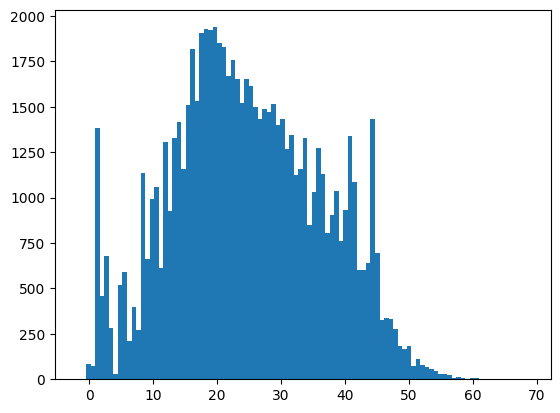

In [24]:
# plot histogram of Vi_sums
import matplotlib.pyplot as plt
plt.hist(list(Vi_sums.values()), bins=100)

In [25]:
def term_frequency(post_id,inverted_index):
    # term frequency of the post
    # use the variable posts
    tf = {}
    for word in inverted_index:
        if str(post_id) in inverted_index[word]:
            tf[word] = inverted_index[word][str(post_id)]/len(posts[posts["Id"] == post_id]["Body"].values[0])
        else:
            tf[word] = 0
    return tf

def prefilter_posts(query_processed, posts):
    # keep only posts that contain all words of the query in the body, title or tags
    # use the variable posts
    print("prefiltering posts...")
    count_words = {}
    for query_word in query_processed:
        for post_id in posts["Id"]:
            post_id = str(post_id)
            if (query_word in inverted_index_body and post_id in inverted_index_body[query_word]) or (query_word in inverted_index_title and post_id in inverted_index_title[query_word]) or (query_word in inverted_index_tags and post_id in inverted_index_tags[query_word]):
                if post_id in count_words:
                    count_words[post_id] += 1
                else:
                    count_words[post_id] = 1
    # get max value in count_words
    max_value = max(count_words.values())
    # get all post_ids that have max_value
    return [int(post_id) for post_id in count_words if count_words[post_id] == max_value]
def CobraSearch(query,posts=posts,top=10,verbose=False):
    query_precessed = text_process(query)
    if(verbose):
        print("query processed: ",query_precessed)
    post_ids_filtered = prefilter_posts(query_precessed,posts)
    if(verbose):
        print("number of posts",len(post_ids_filtered))
    # hyperparameters
    k1 = 1.2
    b = 0.75
    k3 = 1000

    # Vi, score function of each feature
    if verbose:
        print("Vi computed")
    W_scores = {}
    RSV_scores={}
    w_tf_body = 1
    w_tf_title = 5
    w_tf_tags = 10
    w_Ld_body = 1
    w_Ld_title = 3
    w_Ld_tags = 10
    def get_Ld(post_id):
        Ld_body = len(posts[posts["Id"] == post_id]["Body"].values[0])
        Ld_title = len(posts[posts["Id"] == post_id]["Title"].values[0])
        Ld_tags = len(get_raw_tags_from_postid(post_id))
        return Ld_body*w_Ld_body + Ld_title*w_Ld_title + Ld_tags*w_Ld_tags
    # avearge Ld over all post_id
    print()
    m = np.mean([get_Ld(post_id) for post_id in post_ids_filtered])

    for post_id in tqdm(post_ids_filtered):

        term_freq_body = term_frequency(post_id, inverted_index_body)
        term_freq_title = term_frequency(post_id, inverted_index_title)
        term_freq_tags = term_frequency(post_id, inverted_index_tags)
        tf = lambda word: w_tf_body*term_freq_body[word] + w_tf_title*term_freq_title[word] + w_tf_tags*term_freq_tags[word]
        Ld = get_Ld(post_id)
        W_scores[str(post_id)] = 4000*sum([(k1+1)*tf(word)/(k1*((1-b)+b*Ld/m)+tf(word))*(k3+1)*tf(word)/(k3+tf(word))
                               for word in query_precessed if word in inverted_index_body and word in inverted_index_title and word in inverted_index_tags]
                               )
        RSV_scores[str(post_id)] = W_scores[str(post_id)] + Vi_sums[post_id]
    print("Scores computed")
    sorted_keys = sorted(RSV_scores, key=RSV_scores.get, reverse=True)
    # plt.hist(list(W_scores.values()), bins=100)
    # print(RSV_scores)
    return sorted_keys[:top]
    



In [26]:
results = CobraSearch("deep learning neural network pytorch deployment serialisation",posts=posts,top=10,verbose=False)

prefiltering posts...



  0%|          | 0/153 [00:00<?, ?it/s]

Scores computed


In [27]:

print(inverted_index_title["sk"])



{'47604': 1, '101756': 1, '72569': 1, '72734': 1, '22696': 1, '10463': 1, '10476': 1, '51203': 1, '51224': 1, '51236': 1, '12929': 1, '110437': 1, '79871': 1, '107808': 1, '107834': 1, '107838': 1, '107867': 1, '111098': 1, '54018': 1, '54026': 1, '68893': 1, '74444': 1, '74465': 1, '28157': 1, '31657': 1, '31680': 1, '16751': 1, '58491': 1, '58510': 1, '34024': 1, '34061': 1, '84798': 1, '84804': 1, '84827': 1, '23764': 1, '23828': 1, '23843': 1, '45174': 1, '45208': 1, '75726': 1, '39186': 1, '17367': 1, '88879': 1, '87432': 1, '26325': 1, '26918': 1, '13868': 1, '65773': 1, '11214': 1, '21794': 1, '10943': 1, '39252': 1, '52871': 1, '39859': 1, '58181': 1, '39898': 1, '40018': 1, '9854': 1, '106568': 1, '106626': 1, '106627': 1, '68329': 1, '57243': 1, '65024': 1, '93396': 1, '677': 1, '81479': 1, '106879': 1, '106964': 1, '42602': 1, '68998': 1, '69017': 1, '69036': 1, '18804': 1, '104944': 1, '104949': 1, '108939': 1, '108947': 1, '86287': 1, '14690': 1, '115654': 1, '115684': 1, 

In [28]:
result1 = CobraSearch("mesure performance for multiclassification model",posts=posts,top=10)

prefiltering posts...



  0%|          | 0/127 [00:00<?, ?it/s]

Scores computed


In [29]:
print(result1)


['66380', '65664', '53134', '66397', '9823', '72167', '22762', '80785', '41299', '17446']


Interface Tkinter

In [30]:
import tkinter as tk
from PIL import ImageTk, Image
import webbrowser

# create a global variable for the photo object
photo = None

def search(query, top=10):
    # search the query in the database and return the top 10 results
    # use the variable posts
    # use the function CobraSearch
    result = CobraSearch(query)
    return result
    

# Tkinter interface for the search engine
# create a window
window = tk.Tk()
window.title("Search Engine")
window.geometry("1500x1200")  # set window size to 800x1500
window.resizable(False, False)  # disable window resizing
window.configure(bg="#333333")  # set background color to a darker shade of gray

# create a label with a custom font, size, and color
lbl = tk.Label(window, text="Cobra Search", font=("Arial Bold", 50), fg="#14DEA5", bg="#333333")
lbl.pack(pady=20)

# create a frame for the input section
input_frame = tk.Frame(window, bg="#333333")
input_frame.pack(pady=20)

# create a label for the input section with custom font, size, and color
lbl_query = tk.Label(input_frame, text="Enter your query", font=("Arial Bold", 20), fg="white", bg="#333333")
lbl_query.grid(row=0, column=0, padx=10, pady=5, sticky="e")

# create a text entry box with custom font, size, and color
txt = tk.Entry(input_frame, width=50, font=("Arial", 14), bg="#555555", fg="white")
txt.grid(row=0, column=1, padx=5, pady=5, sticky="w")

# create a frame for the result section
result_frame = tk.Frame(window, bg="#333333")
result_frame.pack()

# function to handle link clicks
def open_link(link):
    webbrowser.open(link)

# call the function search when the button is clicked
def clicked():
    query = txt.get()
    result = search(query, top=10)
    result_list.delete(0, tk.END)  # clear previous results
    for post_id in result:
        result_list.insert(tk.END, f"https://datascience.stackexchange.com/questions/{post_id}")
   
def clicked_result(event):
    # get the index of the clicked item
    index = result_list.curselection()[0]
    # get the text of the clicked item
    post_id = result_list.get(index)
    # open the link in the browser
    open_link(post_id)

# bind the click event to the listbox


# create a button with a custom font, size, and color
btn = tk.Button(window, text="Search", command=clicked, font=("Arial", 14), bg="#14DEA5", fg="#333333")
btn.pack(pady=10)

# load the image and create a photo object
img = Image.open("cobralogo.jpeg")
photo = ImageTk.PhotoImage(img)

# create a label with the photo object
panel = tk.Label(window, image=photo, bg="#333333")
panel.pack(pady=20)

# create a listbox for displaying the search results with custom font, size, and color
result_list = tk.Listbox(result_frame, font=("Arial", 14), fg="#14DEA5", bg="#333333", selectbackground="#14DEA5", selectforeground="#333333")
result_list.pack(pady=10, fill=tk.BOTH, expand=True)
result_list.config(width=50,height=10) 

result_list.bind("<<ListboxSelect>>", clicked_result)

window.mainloop()

prefiltering posts...



  0%|          | 0/4517 [00:00<?, ?it/s]

Scores computed


## Evaluation of our search method

In order to evaluate our search engine we are using the NDCG score.

In [34]:
from sklearn.metrics import ndcg_score


def get_ndcg_scores(df_relevancy,method=CobraSearch,top=len(posts)):
    """
    Calculates the NDCG (Normalized Discounted Cumulative Gain) score for each query in the given relevance dataframe
    using the specified search method.

    Parameters:
    -----------
    df_relevancy : pandas.DataFrame
        A dataframe containing the relevance scores for each post and query.
        The first column should contain the post IDs, and the remaining columns from the 4th should be named 'query X',
        where X is the query number starting from 1.
        The values in the columns should be the relevance scores for each post with respect to the corresponding query.
    method : function
        The search method to use for retrieving the top documents for each query.
        The function should take a query string as input and return a pandas.DataFrame containing the top documents.
    top : int, optional
        The number of top documents to retrieve for each query.
        The default value is the total number of posts in the dataset.

    Returns:
    --------
    dict
        A dictionary containing the NDCG score for each query.
        The keys are the query numbers starting from 1, and the values are the corresponding NDCG scores.
    """

    # for each PostId in the relevancy dataframe, get the rank of the post according to the method
    min_relevancy_index=3
    max_relevancy_index=8
    querys = {}
    for i in range(min_relevancy_index, max_relevancy_index):
        querys[i] = df_relevancy.columns[i][10:]
    method_results = {}
    for i in range(min_relevancy_index, max_relevancy_index):
        method_results[i] = method(query=querys[i],top=top) # list of post_id sorted by the method
        method_results[i] = [int(x) for x in method_results[i]] # remove post_id not in posts
    posts_results = {}
    # sort the posts according to the method
    for i in range(min_relevancy_index, max_relevancy_index):
        posts_results[i] = posts[posts["Id"].isin(method_results[i])].copy()
        # sort according to the method
        posts_results[i]["rank"] = posts_results[i]["Id"].apply(lambda x: method_results[i].index(x))
        posts_results[i].sort_values(by=["rank"], inplace=True)
        #print(method_results[i].head())
    # get the score of each post according to the method
    rel_preds = {}
    for i in range(min_relevancy_index, max_relevancy_index):
        # the rankings of the posts in PostId in df_relevancy
        rel_preds[i] = []
        # print(method_results[i])
        for post_id in df_relevancy["PostId"]:
            if int(post_id) in method_results[i]:
                rel_preds[i].append(posts_results[i][posts_results[i]["Id"]==post_id]["rank"].values[0])
            else:
                rel_preds[i].append(top)
        #print(rel_preds[i])
    rel_trues = {}
    for i in range(min_relevancy_index, max_relevancy_index):
        # the rankings of the posts
        rel_trues[i] = df_relevancy[df_relevancy.columns[i]].tolist()
        #print(rel_trues[i])
        rel_trues[i] = [top if np.isnan(x) else x for x in rel_trues[i]]
    # calculate the ndcg score for each query
    ndcg_scores = {}
    for i in range(min_relevancy_index, max_relevancy_index):
        ndcg_scores[i] = ndcg_score([rel_trues[i]], [rel_preds[i]])
    return ndcg_scores
    




In [35]:
# Read Relevancy CSV
df_relevancy = pd.read_excel("evaluation_search_engine_post_queries_ranking_EI_CS.xlsx")
# print(df_relevancy.head())
df_relevancy
print(get_ndcg_scores(df_relevancy,method=CobraSearch))

prefiltering posts...



  0%|          | 0/127 [00:00<?, ?it/s]

Scores computed
prefiltering posts...



  0%|          | 0/58 [00:00<?, ?it/s]

Scores computed
prefiltering posts...



  0%|          | 0/1353 [00:00<?, ?it/s]

Scores computed
prefiltering posts...



  0%|          | 0/447 [00:00<?, ?it/s]

Scores computed
prefiltering posts...



  0%|          | 0/61 [00:00<?, ?it/s]

Scores computed
{3: 0.9340604629174767, 4: 0.8166029099442649, 5: 0.7705534652666164, 6: 0.7705541356330388, 7: 0.8587868868940064}


In [33]:
# test sur quelques requetes
querys = ["object detection machine learning",
          "how to do linear regression in python",
          "similarity scores by clustering",
          "map reduce algorithm database"]
results = {}
for query in querys:
    result = CobraSearch(query=query, top=10)
    results[query] = result

prefiltering posts...



  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
for query in querys:
    print(query)
    print(results[query])
    print("\n")

predictive modeling and machine learning
['51468', '6189', '20201', '96490', '58448', '31167', '102173', '58102', '27431', '17266']


machine learning ensemble modeling hyperparameter meta learning
['36748']


